# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from string import Template
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating the DF
df = pd.DataFrame({"City":cities})
df["Lat"]= ""
df["Lng"]= ""
df["Max Temp"] = ""
df["Humidity"]= ""
df['Cloudiness'] = ""
df["Wind Speed"]= ""
df["Country"] = ""
df["Date"] = ""


In [4]:
# set up a parameters dictionary
params = {
    "units": "&units=Imperial",
    "key": "&appid=" + weather_api_key
}
api = Template("http://api.openweathermap.org/data/2.5/weather?q=${city}${units}${key}")

sets = 1
number = 1
print("Beginning Data Retrieval")
for index,row in df.iterrows():
    params["city"] = row['City']
    base_url = api.substitute(params)
    try:
        weather_response = requests.get(base_url).json()
        print(f"Processing Record {number} of Set {sets} | {row['City']}")
        
        df.loc[index, 'Lat'] = weather_response['coord']['lat']
        df.loc[index, 'Lng'] = weather_response['coord']['lon']
        df.loc[index, 'Max Temp'] = weather_response['main']['temp_max']
        df.loc[index, 'Humidity'] = weather_response['main']['humidity']
        df.loc[index, 'Cloudiness'] =weather_response["clouds"]["all"]
        df.loc[index, 'Wind Speed'] =weather_response['wind']['speed']
        df.loc[index, 'Country'] =weather_response['sys']['country']
        df.loc[index, 'Date'] =int(time.time()) 
        #
    except:
        print("City not found. Skipping...")
    number +=1 
    if number == 51:
        sets += 1
        number = 1
    
    

Beginning Data Retrieval
Processing Record 1 of Set 1 | samarai
Processing Record 2 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 1 | zhangye
Processing Record 4 of Set 1 | tilichiki
Processing Record 5 of Set 1 | carnaiba
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | camacha
Processing Record 10 of Set 1 | ulaanbaatar
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | raga
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | hereford
Processing Record 16 of Set 1 | camargo
Processing Record 17 of Set 1 | boqueirao
Processing Record 18 of Set 1 | onega
Processing Record 19 of Set 1 | paita
Processing Record 20 of Set 1 | deputatskiy
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
P

Processing Record 39 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | sabha
Processing Record 42 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | bourbonnais
Processing Record 46 of Set 4 | iqaluit
Processing Record 47 of Set 4 | sao jose da coroa grande
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | chadiza
Processing Record 50 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 5 | mar del plata
Processing Record 2 of Set 5 | barra do garcas
Processing Record 3 of Set 5 | biak
Processing Record 4 of Set 5 | chongqing
Processing Record 5 of Set 5 | ciudad bolivar
Processing Record 6 of Set 5 | pontes e lacerda
Processing Record 7 of Set 5 | palmer
Processing Record 8 of Set 5 | mutsamudu
City not found. Skipping...
Processing Record 9 of

Processing Record 27 of Set 8 | le port
Processing Record 28 of Set 8 | jacareacanga
Processing Record 29 of Set 8 | cayenne
Processing Record 30 of Set 8 | morondava
Processing Record 31 of Set 8 | guerrero negro
Processing Record 32 of Set 8 | coquimbo
Processing Record 33 of Set 8 | key largo
Processing Record 34 of Set 8 | bayonet point
Processing Record 35 of Set 8 | kagoro
Processing Record 36 of Set 8 | narsaq
Processing Record 37 of Set 8 | mayo
Processing Record 38 of Set 8 | kalaleh
Processing Record 39 of Set 8 | broome
Processing Record 40 of Set 8 | college
Processing Record 41 of Set 8 | serafimovich
Processing Record 42 of Set 8 | shirokiy
Processing Record 43 of Set 8 | skibbereen
Processing Record 44 of Set 8 | moiyabana
City not found. Skipping...
Processing Record 45 of Set 8 | miraflores
Processing Record 46 of Set 8 | sao francisco
Processing Record 47 of Set 8 | marcona
City not found. Skipping...
Processing Record 48 of Set 8 | surin
Processing Record 49 of Set 8

Processing Record 16 of Set 12 | awbari
Processing Record 17 of Set 12 | al
City not found. Skipping...
Processing Record 18 of Set 12 | tadine
Processing Record 19 of Set 12 | ulladulla
Processing Record 20 of Set 12 | manica
Processing Record 21 of Set 12 | sam chuk
Processing Record 22 of Set 12 | moscow
Processing Record 23 of Set 12 | mukhen
Processing Record 24 of Set 12 | oistins
Processing Record 25 of Set 12 | sal rei
Processing Record 26 of Set 12 | sola
Processing Record 27 of Set 12 | lucapa
Processing Record 28 of Set 12 | omagari
Processing Record 29 of Set 12 | ye
City not found. Skipping...
Processing Record 30 of Set 12 | maniitsoq
Processing Record 31 of Set 12 | ocampo
Processing Record 32 of Set 12 | sibolga
Processing Record 33 of Set 12 | conceicao do araguaia
Processing Record 34 of Set 12 | dubenskiy
City not found. Skipping...
Processing Record 35 of Set 12 | ambanja
Processing Record 36 of Set 12 | kokkola
Processing Record 37 of Set 12 | wanning
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
df=df.replace('',np.nan).dropna(axis = 0, how = 'any')
df.reset_index()
df.to_csv(output_data_file)


In [15]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,19.463422,13.794709,52.394223,72.647469,50.727749,8.073473,1.614646e+09
std,32.745924,88.178712,29.899984,21.808239,41.673547,5.540488,4.228734e+01
min,-54.800000,-175.200000,-38.780000,8.000000,0.000000,0.360000,1.614646e+09
25%,-7.404100,-59.796800,35.010000,64.000000,1.000000,3.960000,1.614646e+09
50%,20.900000,18.423200,62.600000,78.000000,54.000000,6.910000,1.614646e+09
75%,46.485600,87.203900,75.330000,89.000000,95.000000,11.010000,1.614646e+09
max,78.218600,178.416700,93.200000,100.000000,100.000000,34.180000,1.614646e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
humidity_grt_100 = df[df["Humidity"] > 100]
humidity_grt_100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

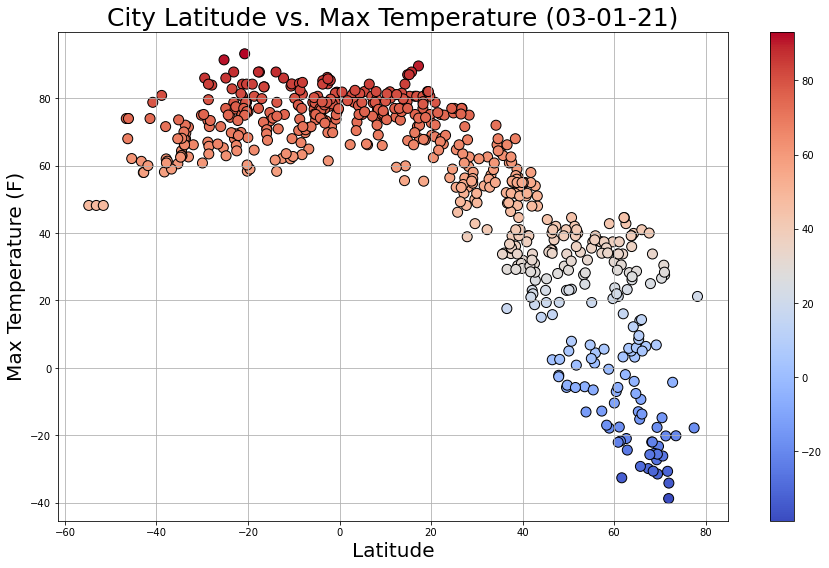

In [19]:
latitues = df['Lat']
temps = df['Max Temp']

plt.figure(figsize=(15,9))
plt.grid()
today = datetime.today().strftime('%m-%d-%y')
plt.title(f"City Latitude vs. Max Temperature ({today})", fontsize=25)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (F)",fontsize=20)
ax = plt.scatter(latitues, temps, s=100, c=temps, cmap='coolwarm', edgecolors="black" )
plt.colorbar()
plt.savefig("Temp_city.png")

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression